In [1]:
import numpy as np #matrix math
from sklearn.model_selection import train_test_split #to split out training and testing data
#keras is a high level wrapper on top of tensorflow (machine learning library)
#The Sequential container is a linear stack of layers
from keras.models import Sequential
#popular optimization strategy that uses gradient descent
from keras.optimizers import Adam
#to save our model periodically as checkpoints for loading later
from keras.callbacks import ModelCheckpoint
#what types of layers do we want our model to have?
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
#helper class to define input shape and generate training images given image paths & steering angles
from utils import INPUT_SHAPE, batch_generator, preprocess
#for reading files
import os
import csv
import cv2
import matplotlib.pyplot as plt

def path_cleanup(path):

    filename = path.split('/')[-1]
    current_path = './data/IMG/' + filename
    return current_path

lines = []
with open('./data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

for i in range(len(lines)):
    for o in range(3):
        lines[i][o] = path_cleanup(lines[i][o])


Using TensorFlow backend.


In [2]:
len(lines)

18562

In [3]:
angles = np.array([float(line[3])*10 for line in lines])

In [5]:
def track_divisor(angles):
    #After the first instance of a steep turning angle, divide the data in two
    i = 0
    while -5 < angles[i] and angles[i] < 5:
        i = i + 1
    return i

This graph shows the angles of the easy track, with four laps


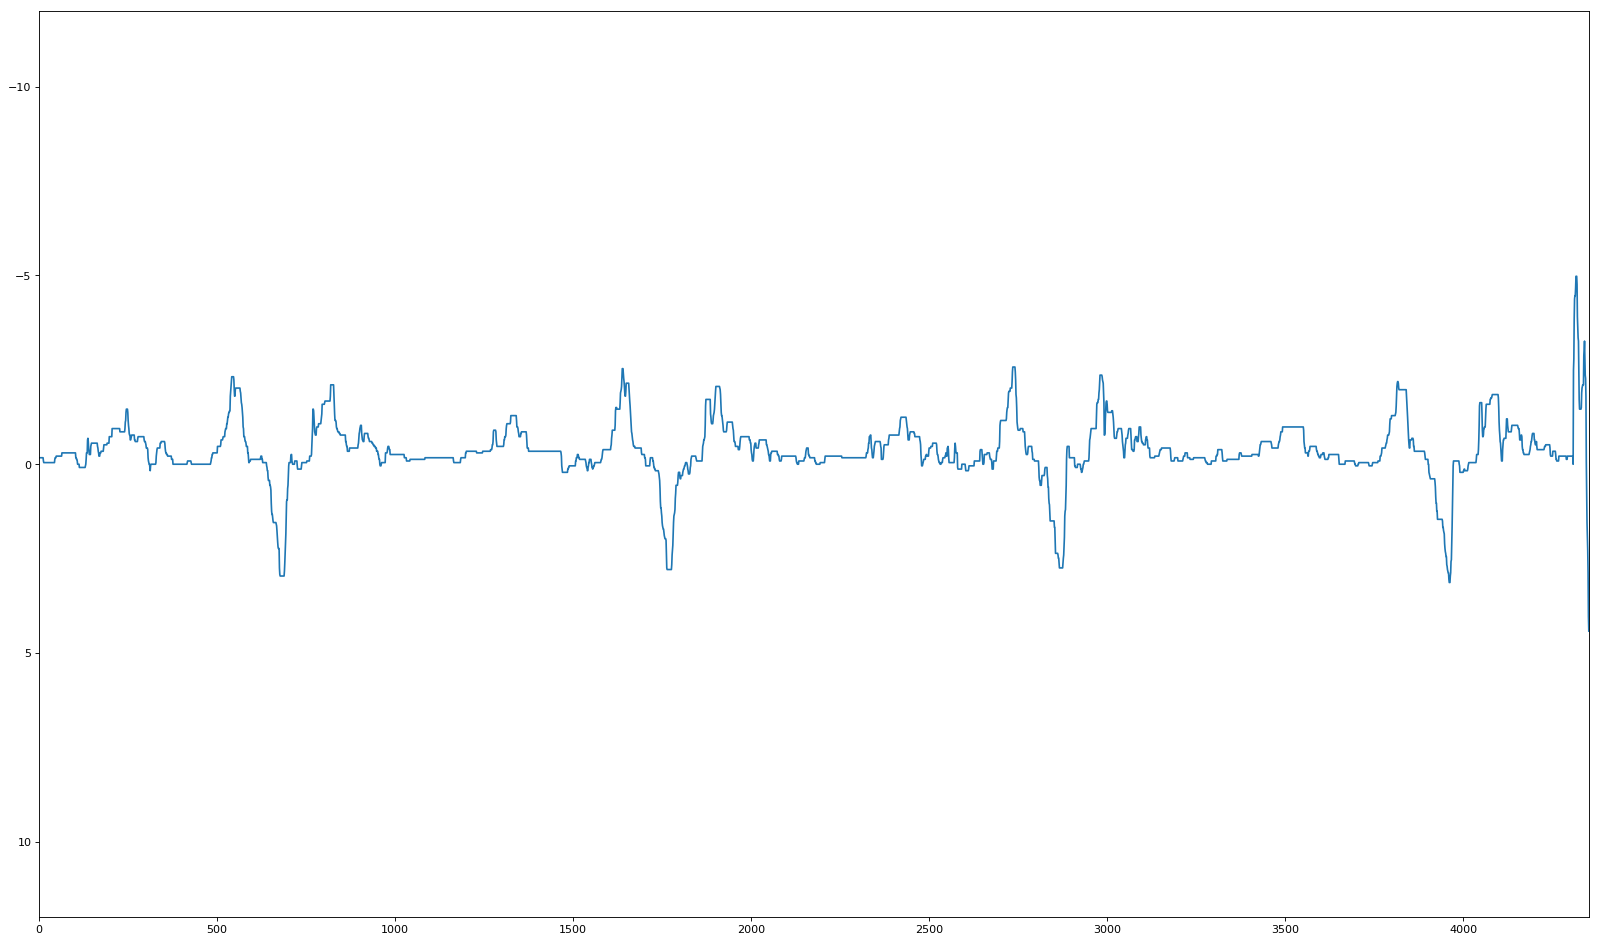

In [6]:
print('This graph shows the angles of the easy track, with four laps')

plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
split_point = track_divisor(angles)
plt.plot(angles[0:split_point])
plt.axis([0, split_point, 12, -12])
plt.show()

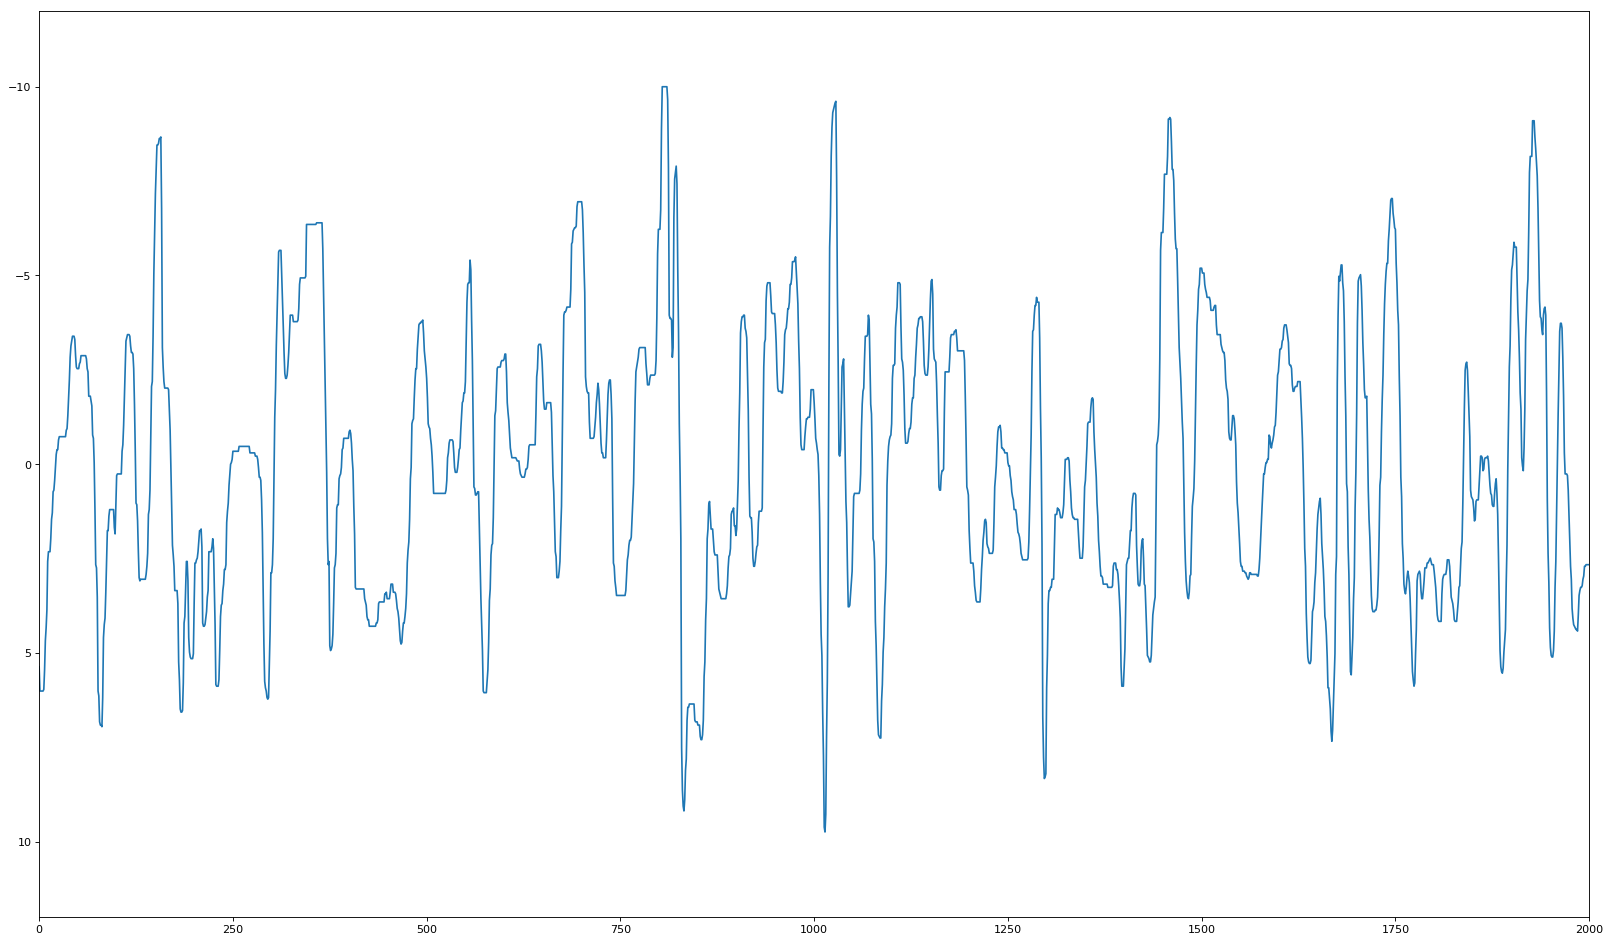

In [7]:
plt.figure(num=None, figsize=(25, 15), dpi=80, facecolor='w', edgecolor='k')
plt.plot(angles[split_point:split_point+2000])
plt.axis([0, 2000, 12, -12])
plt.show()

In [8]:
import random
import utils

In [9]:
pics = [random.choice(random.choice(lines)[:3]) for i in range(10)]
examples = np.array([utils.load_image(pic) for pic in pics])

In [10]:
examples

array([[[[130, 163, 208],
         [130, 163, 208],
         [129, 162, 207],
         ..., 
         [ 58,  46,   4],
         [ 70,  58,  18],
         [ 40,  28,   0]],

        [[130, 163, 208],
         [130, 163, 208],
         [130, 163, 208],
         ..., 
         [ 87,  75,  35],
         [ 60,  48,  10],
         [ 74,  62,  24]],

        [[131, 164, 209],
         [131, 164, 209],
         [130, 163, 208],
         ..., 
         [ 64,  52,  12],
         [ 70,  58,  20],
         [ 75,  62,  27]],

        ..., 
        [[111, 120,  93],
         [ 88,  97,  70],
         [ 86,  94,  71],
         ..., 
         [189, 194, 172],
         [182, 187, 165],
         [175, 180, 158]],

        [[130, 140, 116],
         [114, 123, 102],
         [111, 118, 102],
         ..., 
         [167, 172, 149],
         [174, 179, 156],
         [179, 184, 161]],

        [[117, 126, 107],
         [108, 117, 100],
         [103, 111,  98],
         ..., 
         [180, 185, 162],
  

In [42]:
i = random.randint(0,len(lines))
image, steer = utils.load_image(lines[i][0]), float(lines[i][3])

In [7]:
! pip install pydot  

  Running setup.py bdist_wheel for pydot ... done
  Stored in directory: /home/brian/.cache/pip/wheels/47/8c/c2/4ac7bd0219b4ce5e08d03dc3467014c7a94b2efecfc29df2b2
Successfully built pydot


In [52]:
def show(image, steer):
    print(steer)
    plt.imshow(image)
    plt.show()

-0.8470589


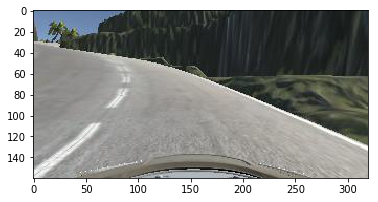

In [43]:
show(image, steer)
plt.savefig('orginal.jpg')

0.8470589


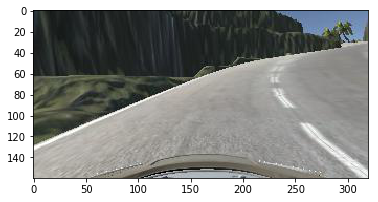

In [44]:
image, steer = utils.random_flip(image, steer)
show(image, steer)

0.8743762763813


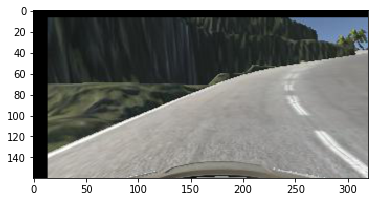

In [45]:
image, steer = utils.random_translate(image, steer, 80, 50) 
show(image, steer)

0.8743762763813


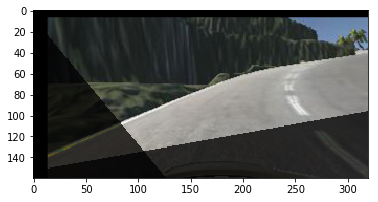

In [47]:
image = utils.random_shadow(image)
show(image, steer)

0.8743762763813


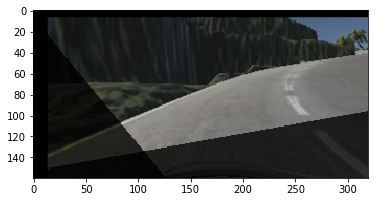

In [50]:
image = utils.random_brightness(image)
show(image, steer)

0.8743762763813


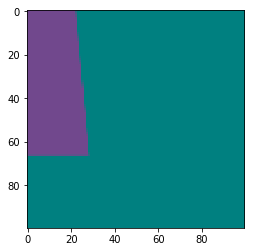

In [55]:
image = utils.preprocess(image)
show(image, steer)

In [ ]:
center_images = [utils.load_image(line[0]) for line in lines]

In [ ]:
timestamp = datetime.utcnow().strftime('%Y_%m_%d_%H_%M_%S_%f')[:-3]
image_filename = os.path.join(args.image_folder, timestamp)
imsave('{}.jpg'.format(image_filename), image)

In [ ]:
example = random.choice(center_images)

In [ ]:
plt.imshow(example)
plt.show()

In [12]:
import numpy as np #matrix math
from sklearn.model_selection import train_test_split #to split out training and testing data
#keras is a high level wrapper on top of tensorflow (machine learning library)
#The Sequential container is a linear stack of layers
from keras.models import Sequential
#popular optimization strategy that uses gradient descent
from keras.optimizers import Adam
#to save our model periodically as checkpoints for loading later
from keras.callbacks import ModelCheckpoint
#what types of layers do we want our model to have?
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten
#helper class to define input shape and generate training images given image paths & steering angles
from utils import INPUT_SHAPE, batch_generator, preprocess
#for reading files
import os
import csv
import cv2

model = Sequential()
model.add(Lambda(lambda x: (x/255)-0.5, input_shape=INPUT_SHAPE))
model.add(Conv2D(24, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(36, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(48, 5, 5, activation='elu', subsample=(2, 2)))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(Conv2D(64, 1, 1, border_mode='same', activation='elu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(Conv2D(64, 1, 1, border_mode='same', activation='elu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(Conv2D(64, 1, 1, border_mode='same', activation='elu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='elu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='elu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

from keras.utils.visualize_util import plot  
plot(model, to_file='model.png')  

# **Behavioral Cloning** 

[//]: # (Image References)

[image1]: ./examples/correction_curved_in.png "curved in"
[image2]: ./examples/correction_curved_out.png "curved out"
[image3]: ./examples/correction_right.png "right side"
[image4]: ./examples/track1.jpg "turning angles ca"
[image5]: ./examples/track2.jpg "turning angles sharp"
[image6]: ./examples/original-0.847.jpg "Normal Image"
[image7]: ./examples/flipped0.847.jpg "Flipped Image"
[image8]: ./examples/translated0.874.jpg "Moved Image"
[image9]: ./examples/shadows_and_darkened.jpg "Shadowed Image"
[image10]: ./examples/Input_ready.jpg "Final Image"
[image11]: ./examples/model.png "model diagram"
[image12]: ./examples/straight.png "normal example"

---

####  Model architecture




| Type of layer   |      Input shape      |   Number of parameters|   Layer name|
| :-------------: | :-------------------: | :---------: | :----------: | 
| lambda_1        | (None, 100, 100, 3)   | 0           | Image  |    
| Convolution 5x5 | (None, 48, 48, 24)    | 1824        | lambda_1  |      
| Convolution 5x5 | (None, 22, 22, 36)    | 21636       | convolution2d_1 |  
| Convolution 5x5 | (None, 9, 9, 48)      | 43248       | convolution2d_2 |      
| Convolution 3x3 | (None, 9, 9, 64)      | 27712       | convolution2d_3 |    
| Convolution 3x3 | (None, 9, 9, 64)      | 36928       | convolution2d_4 |        
| Convolution 1x1 | (None, 9, 9, 64)      | 4160        | convolution2d_5 |      
| Convolution 3x3 | (None, 9, 9, 64)      | 36928       | convolution2d_6 |         
| Convolution 1x1 | (None, 9, 9, 64)      | 4160        | convolution2d_7 |         
| Convolution 3x3 | (None, 9, 9, 64)      | 36928       | convolution2d_8 |   
| Convolution 1x1 | (None, 9, 9, 64)      | 4160        | convolution2d_9 |        
| Convolution 3x3 | (None, 9, 9, 64)      | 36928       | convolution2d_10 |        
| Max Pool  | (None, 4, 4, 64)      |0           | convolution2d_11 |
| Flatten       | (None, 1024)          |0           | maxpooling2d_1 |            
| Dropout       |(None, 1024)          |0           | flatten_1   |              
| Dense         |(None, 500)           |512500      |dropout_1    |             
| Dropout       |(None, 500)           |0           |dense_1      |            
| Dense         |(None, 100)           |50100       |dropout_2    |            
| Dropout       |(None, 100)           |0           |dense_2      |             
| Dense         |(None, 25)            |2525        |dropout_3    |             
| Dropout       |(None, 25)            |0           |dense_3      |            
| Dense         |(None, 10)            |260         |dropout_4    |             
| Dense         |(None, 1)             |11          |dense_4      |              


In summary, I've used three 5x5 convolutional layers with increasing stacks of filters, then I use 3x3 convolutions alternating with 1x1 convolutions three times, all with the same 64 filters and Same padding. At the end of the final convolution I use a max_pool and then alternating dropout and fully connected layers with shrinking numbers of nodes. Finally there is the single predicted value of the steering angle.

#### Overfitting precautions

I used dropout at 20% between each fully-connected layer, meaning four dropout layers.

#### Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually.

#### Appropriate training data

First, I learned how to drive well using the mouse. My final challenge before I began driving was to finish two laps at full speed on the harder jungle track. After that I began to collect data. In total, I used a set of two laps in both directions using the smoothest possible turning to stay centered in the lane, then I gathered recovery data assuming small drifts away from center, all the while avoiding sharp jerks, instead finding the correct angle to hold steady throughout the entire turn. A total of 50 GB of data was loaded in before augmentation, or 55,686 images counting left, center, and right images. 44,548 of which were trained on, 11,138 of which were validation.

### Model Architecture and Training Strategy

#### Training Strategy

Overall, I wanted to have a series of convolutions and then a series of fully connected layers. Starting with the Nvidia model and expanding it, I found that the final model yeilded the best results compaired with using more 3x3 by themselves, expading the fully-connected layers or using a single 7x7 layer before the three 5x5 layers.

I knew the Nvidia model had been used for this before and had worked, but I was having issues with responsiveness, on the jungle track the car would fly off a cliff rather than turn. After adding the perspective shift to the preproccessing step and the additional layers, the final epoch of training was able to complete the harder track in either direction, and I was satasfied with those results.

I saved models based on weather they were the best so far on the validation error. I never ran into an issue with overfitting to the test data, I always had comparible and reasonable percentage error from both sets, usually starting at 25% error and reducing to approximentally 4%. For comparison, the first epoch and final epoch of training for the final architecture are saved.

Whenever the model failed to behave on the tracks, I would gather several sets of corrective data for that spot specifically.

At the end of the process, the vehicle is able to drive autonomously around the track without leaving the road on both tracks, in either direction, it also resists attempts to interfer and will drive back to the center.

![alt text][image11]

#### 3. Creation of the Training Set & Training Process

To capture good driving behavior, I first recorded two laps on both track forward and backward using calm, controlled center lane driving. Here is an example image of center lane driving:

![alt text][image12]

I then recorded the vehicle recovering from the left side and right sides of the road back to center so that the vehicle would learn to fix its mistakes BEFORE they get out of hand and a crash occurs. These images show what a recovery looks like starting from the right and left of the lane, during a turn and when going straight:

![alt text][image1]
![alt text][image2]
![alt text][image3]

As you can see, before I recorded each recovery I would place myself slightly less than a car width from the center, then click the center of the car, dragging till the mouse hovered over the center of the road. Then, as I both record and start moving, I would remain over the center, slowly reducing the angle back to center driving. I always sought to keep driving calm and controlled when training the network.

Then I repeated this process on track two in order to get more data points.

To augment the data sat, I used the utils, modified to use a single directory string.
There was an equal chance of a center, left, or right image being used with an adjested steering angle to help with recovery to center.
The orginal image used for this example is this:
![alt text][image6]
The is a 50% chance that each image will be flipped, this means there will be an equal number of left and right turning images.
![alt text][image7]
Then there is a random translation applied, there can be any translation within the range of 100 horizontally and 50 vertically.
![alt text][image8]
Then shadows are simulated with darkened geometric patches, and brightness can be randomly increased or decreased
![alt text][image9]
in preprocessing, the perspective is shifted to be taller, the rgb is turned to yuv and the final size is 100x100
![alt text][image10]

I finally randomly shuffled the data set and put 20% of the data into a validation set. 

The training set accuracy never reached near 100% and always went slowly down with each epoch. From this, I decided to train for many epochs in an attempt to find the overfitting point. After 30 epochs, I still hadn't found the point wear testing accuracy was 100% while validation accuracy dropped down again. The final model was on epoch 29 when it was saved due to it having the highest validation accuracy.